### 아이디어
- `가가두`란 애칭이 존재하는 웰노운 문제. 어쩌다보니 태그를 스포당해버렸다. 기하, 스위핑, 분할정복.
- 문제는 $O(N \log N)$ 쯤에 풀릴 것으로 보인다. 어떻게 해야 할지 생각해보자.
  - 한 점 $A$ 를 잡고 또 다른 점 $B$ 를 잡고 $\overline {AB}$ 의 길이를 $d = dx^2 + dy^2$ 라고 하자. \
  만약 $A$ 에서 거리를 절반씩 줄일 수 있을까? 매번 거리가 절반씩 줄어들게 하는 점을 빠르게 찾을 수 있다면, 한 점당 가가두의 후보를 $O(\log N)$ 에 찾을 수 있을 것 같다.
    - 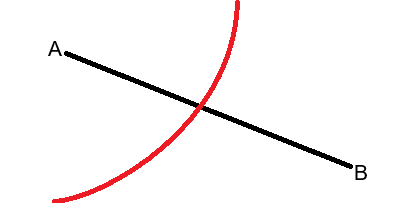\
    그림이 개떡같지만, 대충 $\frac {\overline {AB}}{2}$ 를 반지름으로 하는 원의 내부에서, 아무 점 하나라도 빠르게 찾을 수 있다면 된다는 뜻이다.
    - 뭔가.. 안될 것 같다. 두 점의 길이는 계산되지 않았으니, 좌표를 기준으로 거리를 판단해야한다.\
    예를들어 $dx^2 + dy^2 = d$ 라고 했는데, 그렇다면 다음 좌표쌍 $d'x, d'y$ 를 찾을 때 무엇 먼저 봐야한다는 뜻인가? \
    $d'x$ 가 몇 이였든, $d'y$ 를 보기 전까지는 그게 절반보다 가까운 점인지 알 수 없다.\
    $x$ 와 $d'x$ 와 $d'y$ 의 비율(대충 삼각함수를 적당히 써서)을 기준으로 어떤 criteria을 만들고, \
    그걸 $A$ 로부터 적용시켜 $O(\log N)$ 에 쿼리할 수 있는 자료구조가 존재한다?\
    있다고 해도 이건 내 능력 외이다. 존재하는지도 모르겠다.
  - 이번엔 거꾸로 임의의 한 점 $A$ 를 잡고, 나머지 점과의 거리를 전부 재보는 $O(N)$ 스캔을 수행한 뒤,\
  더 짧은 거리를 만들 수 있는 다음 스캔 후보 점 $A'$ 를 찾는 과정을 $O(\log N)$ 번만 반복하는 방법은 어떨까?
    - 우선, $A$ 로부터 가장 가까운 점과 가장 먼 점이 뭔지와, 그 거리를 알 수 있다. 그 두 점을 일단 $I, B$ 라고 해보자.
    - 목표는 길이가 $\overline {AI}$ 이하인 쌍을 찾는 것.
    - 문제의 정답은 반드시 $\overline {AB}$ 를 반지름으로 하는 원 안에 있다. 
      - (증명) 그 바깥에 정답이 존재한다고 해보자. \
      그런데, 원 밖에 있다는 뜻은 그 점이 $B$ 보다 더 멀리있다는 뜻이다. \
      그럼 $B$ 의 정의에 따라 모순. 또한, 어떤 점도 원 바깥에 존재할 수 없다.
    - 이제 절반씩 줄일 방법이 있어야 한다.
    - 뭔가.. 의도한 풀이는 아닌 것 같은데, $A$ 로부터의 특수한 삼각함수로 유도한 criteria를 구해서, \
    그 차이가 가장 적은 점들끼리의 거리를 구하는 방법으로 $O(N)$ 만에 문제를 풀어버릴 방법을 생각해버렸다.\
    정해를 풀고 나서 만약 가능한지 확인해봐야겠다.
    - 좀 더 생각해봤지만, 그럴싸한 방법이 떠오르지 않는다.
  

### 풀이
- https://casterian.net/algo-prob/boj2261.html
- 분할 정복으로 접근한다는 것은 패턴적으로 보면 히트로그램에서 가장 큰 직사각형을 떠올려야 했었던 것 같다.\
병합정렬이랑 퀵정렬이 지금 머릿속에 잘 안들어와 있던게 풀이를 못떠올린 이유가 아닐까 싶다.
  - 다음에 $O(N \log N)$ 의 풀이법을 떠올려야 한다면, 가운데에 pivot을 두는 분할 정복방식을 떠올려보자.
- 추가로 off-by-one으로 주의해야할 점. 구간 $[l, r]$ 에 대한 분할정복 함수를 설계할 때, 구간의 길이 $n = r - l + 1$ 이고, 이 구간을 순회한다고 해보자. 다음은 모두 같다
  - `i in range(l, r+1)`
  - `i in range(l, l+n)`
  - `i in range(n): k = l + i`
  - 이 중에서 실수로 1을 더하거나 빼는 등의 실수를 한다면 off-by-one이다. 그냥 외워야 할 것 같다.
    - 아예 이참에 디버깅 문서에 off-by-one 문단을 따로 적어야겠다.